<a href="https://colab.research.google.com/github/whukam/neuralNetworkProject/blob/main/cycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unpaired image to image Translation using Cycle Generative Adversarial Network #


Our goal for the project was to transfer image style from one dataset to a sample image


In [ ]:
# resizing the image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os 


import tensorflow as tf
import tensorflow_datasets as tfds
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2DTranspose, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, BatchNormalization



# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [ ]:
%cd /content/

/content


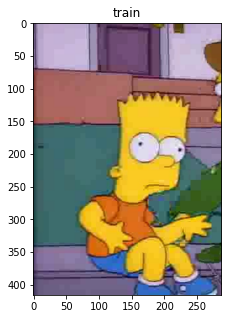

In [ ]:

# the data from training /simpson images are present in the dataset folder with sharpened version in Preprocessing
# it contains 360 images in total 
image = cv2.imread('./drive/MyDrive/NNProDrive/neuralNetworkProject/pic_0009.jpg')       #this file is also present in the repository of the project 
#print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("train")
plt.imshow(image)

train = image

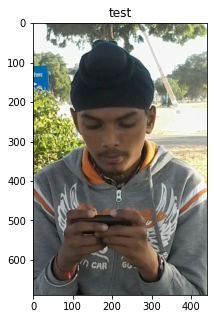

In [ ]:
# the data from training F /human images are present in the hukam_dataset folder with sharpened version in hukam_Preproprocessing
# it contains 200 images in total 

#Testing the image for sample data 
image = cv2.imread('./drive/MyDrive/NNProDrive/neuralNetworkProject/hukam_dataset/20131130_084426-1.jpg') #this file is also present in the repository of the project 
#print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(5, 5))
plt.title("test")
plt.imshow(image)

test = image.reshape

In [ ]:

test_data = np.asarray(test)

### Defining the generator class ###



In [ ]:

def generator():
    model = Sequential()
    model.add(Dense(64*64*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((64, 64, 256))) 

    model.add(Conv2DTranspose(128, (9, 9), strides=(1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (9, 9), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (9, 9), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

### Defining the Discriminator class ###

In [ ]:
def discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2DTranspose(32, 5, input_shape = (128,128,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2DTranspose(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2DTranspose(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2DTranspose(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [ ]:
generator_s2h = generator()
generator_h2s = generator()

discriminator_s2h = discriminator()
discriminator_h2s = discriminator()

#### The summary

In [ ]:
generator_s2h.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1048576)           104857600 
                                                                 
 batch_normalization_12 (Bat  (None, 1048576)          4194304   
 chNormalization)                                                
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 1048576)           0         
                                                                 
 reshape_4 (Reshape)         (None, 64, 64, 256)       0         
                                                                 
 conv2d_transpose_28 (Conv2D  (None, 64, 64, 128)      2654208   
 Transpose)                                                      
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 128)     

In [ ]:
discriminator_s2h.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_34 (Conv2D  (None, 132, 132, 32)     832       
 Transpose)                                                      
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 132, 132, 32)      0         
                                                                 
 dropout_20 (Dropout)        (None, 132, 132, 32)      0         
                                                                 
 conv2d_transpose_35 (Conv2D  (None, 136, 136, 64)     51264     
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 136, 136, 64)      0         
                                                                 
 dropout_21 (Dropout)        (None, 136, 136, 64)    

......................................

.............................................................

*/////////////////////////////////////

### The cycle consistency loss ###


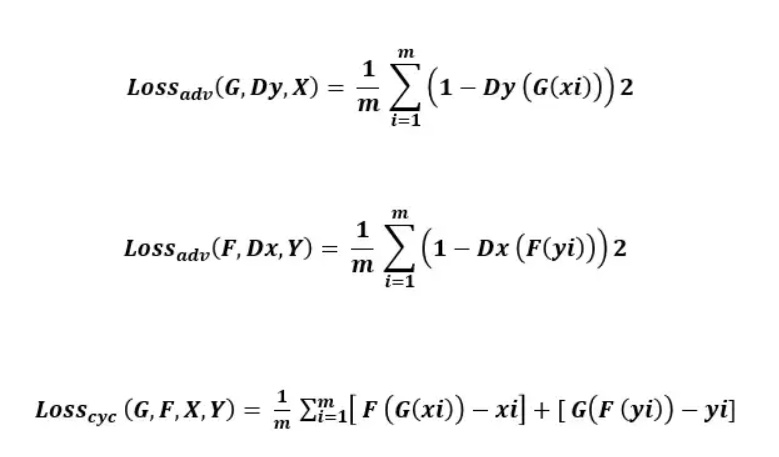

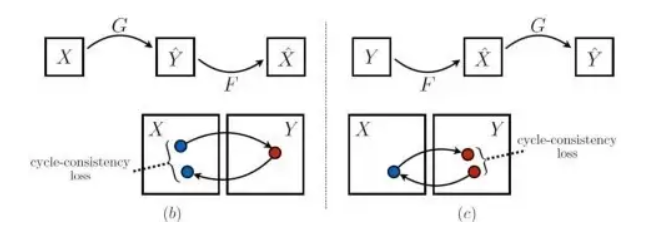


$$Identity\ loss = |G(Y) - Y| + |F(X) - X|$$


In [ ]:
opt_obj = Adam(2e-4, beta_1=0.5) 
loss_obj = BinaryCrossentropy(from_logits=True)

In [ ]:

class cycleGAN(Model): 
    def __init__(self, generator_s2h, discriminator_s2h, generator_h2s, discriminator_h2s, *args, **kwargs):
      # Pass through args and kwargs to base class 
      super().__init__(*args, **kwargs)
      
      self.LAMBDA = 15
      # Create attributes for gen and disc
      self.generator_g = generator_s2h
      self.generator_f = generator_h2s
      
      self.discriminator_x = discriminator_s2h
      self.discriminator_y = discriminator_h2s

    def discriminator_loss(real, generated):
      real_loss = loss_obj(tf.ones_like(real), real)
      
      generated_loss = loss_obj(tf.zeros_like(generated), generated)
      
      total_disc_loss = real_loss + generated_loss
      
      return total_disc_loss * 0.5
    
    def generator_loss(generated):
      return loss_obj(tf.ones_like(generated), generated)

    
    def calc_cycle_loss(self, real_image, cycled_image):
      loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
      return self.LAMBDA * loss1
    
    def identity_loss(self, real_image, same_image):
      loss = tf.reduce_mean(tf.abs(real_image - same_image))
      return self.LAMBDA * 0.5 * loss



    def compile(self, opt_obj, loss_obj, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.generator_g_optimizer = opt_obj
        self.discriminator_x_optimizer = opt_obj

        self.generator_f_optimizer = opt_obj
        self.discriminator_y_optimizer = opt_obj


    def train_step(self, real_x, real_y):
      # persistent is set to True because the tape is used more than
      # once to calculate the gradients.
      
      
      with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
        
        
        fake_y = self.generator_g(real_x, training=True)
        cycled_x = self.generator_f(fake_y, training=True)
          
        fake_x = self.generator_f(real_y, training=True)
        cycled_y = self.generator_g(fake_x, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = self.generator_f(real_x, training=True)
        same_y = self.generator_g(real_y, training=True)
        
        disc_real_x = self.discriminator_x(real_x, training=True)
        disc_real_y = self.discriminator_y(real_y, training=True)
        
        disc_fake_x = self.discriminator_x(fake_x, training=True)
        disc_fake_y = self.discriminator_y(fake_y, training=True)
        
        # calculate the loss
        gen_g_loss = self.generator_loss(disc_fake_y)
        gen_f_loss = self.generator_loss(disc_fake_x)
        
        total_cycle_loss = self.calc_cycle_loss(real_x, cycled_x) + self.calc_cycle_loss(real_y, cycled_y)
        
        
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + self.identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + self.identity_loss(real_x, same_x)
        
        disc_x_loss = self.discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = self.discriminator_loss(disc_real_y, disc_fake_y)
        
        
        # Calculate the gradients for generator and discriminator
        generator_g_gradients = tape.gradient(total_gen_g_loss, self.generator_g.trainable_variables)
        
        generator_f_gradients = tape.gradient(total_gen_f_loss, self.generator_f.trainable_variables)
        
        
        discriminator_x_gradients = tape.gradient(disc_x_loss, self.discriminator_x.trainable_variables)
        
        discriminator_y_gradients = tape.gradient(disc_y_loss, self.discriminator_y.trainable_variables)
        
        
        # Apply the gradients to the optimizer
        self.generator_g_optimizer.apply_gradients(zip(generator_g_gradients, self.generator_g.trainable_variables))
        
        self.generator_f_optimizer.apply_gradients(zip(generator_f_gradients, self.generator_f.trainable_variables))
        
        
        self.discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, self.discriminator_x.trainable_variables))
        
        self.discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, self.discriminator_y.trainable_variables))

        return {"discriminator_x_loss":disc_x_loss, "generator_g_loss":total_gen_g_loss,"discriminator_y_loss":disc_y_loss, "generator_f_loss":total_gen_f_loss}


    def give_image(self, image):
      return self.generator_f.predict(image)
    

In [ ]:
# Create instance of subclassed model
GAN_model = cycleGAN(generator_s2h, discriminator_s2h, generator_h2s, discriminator_h2s)

In [ ]:
# Compile the model
GAN_model.compile(opt_obj, loss_obj)

In [ ]:
hist = GAN_model.fit(train,test, epochs=20)

In [ ]:
# checking performance 

plt.suptitle('Loss')
plt.plot(hist.history['generator_g_loss'], label='generator_g_loss')
plt.plot(hist.history['discriminator_x_loss'], label='discriminator_x_loss')
plt.plot(hist.history['generator_f_loss'], label='generator_f_loss')
plt.plot(hist.history['discriminator_y_loss'], label='discriminator_y_loss')
plt.legend()
plt.show()

"plt.suptitle('Loss')\nplt.plot(hist.history['d_loss'], label='d_loss')\nplt.plot(hist.history['g_loss'], label='g_loss')\nplt.legend()\nplt.show()"

In [ ]:
imgs = GAN_model.give_image(test)